In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [4]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
! kaggle datasets download -d zygmunt/goodbooks-10k

100% 11.6M/11.6M [00:00<00:00, 21.4MB/s]
100% 11.6M/11.6M [00:00<00:00, 13.9MB/s]


In [ ]:
! unzip \*.zip && rm *.zip

Archive:  goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


In [5]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
 
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')

Terdapat 5 variabel pada dataset yang dipilih dan ada 2 variabel yang akan dipakai yaitu:

*   books: merupakan data seluruh buku
*   ratings: merupakan rating buku yang diberikan pengguna dalam rentang 1-5







In [6]:
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [19]:
books['title'][2]

'Twilight (Twilight, #1)'

Terdapat 23 kolom pada variabel books yaitu id, book_id, best_book_id, work_id, books_count, isbn, isbn13, authors,original_publication_year, original_title, title, language_code, average_rating, ratings_count, work_text_reviews_count, ratings_1, ratings_2, ratings_3, ratings_4, ratings_5, image_url, dan small_image_url

In [12]:
print('Jumlah data buku: ', len(books.book_id.unique()))

Jumlah data buku:  10000


In [13]:
ratings

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


Terdaapat 3 kolom pada variabel ratings yaitu book_id, user_id dan rating.

In [14]:
print('Jumlah user: ', len(ratings.user_id.unique()))

Jumlah user:  53424


In [15]:
# Cek missing value books
books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

Terdapat missing value pada beberapa kolom. Ambil kolom penting yang akan dipakai dari variabel books dengan tidak ada missing value

In [16]:
books = books[['book_id', 'title']]
books

,book_id,title
0,2767052,"The Hunger Games (The Hunger Games, #1)"
1,3,Harry Potter and the Sorcerer's Stone (Harry P...
2,41865,"Twilight (Twilight, #1)"
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby
...,...,...
9995,7130616,"Bayou Moon (The Edge, #2)"
9996,208324,"Means of Ascent (The Years of Lyndon Johnson, #2)"
9997,77431,The Mauritius Command
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...


Pada books_dataset terdapat 2 kolom yaitu:


*   book id : Id buku
*   title : judul buku




In [20]:
# Cek missing value ratings
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

Karena tidak ada missing value pada ratings maka tidak perlu dilakukan pembersihan missing value

In [21]:
# merge variabel book dengan ratings
books_rating = pd.merge(books, ratings, on='book_id')
books_rating

,book_id,title,user_id,rating
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,314,3
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,588,1
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,2077,2
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,2487,3
4,3,Harry Potter and the Sorcerer's Stone (Harry P...,2900,3
...,...,...,...,...
79696,8914,The First World War,46715,4
79697,8914,The First World War,47073,4
79698,8914,The First World War,49663,3
79699,8914,The First World War,50305,3


Setelah dilakukan merge pada variabel books dan ratings  berdasarkan book_id, jumlah data rating terhadap buku keseluruhan menjadi 79701 baris

In [ ]:
print('Jumlah data buku: ', len(books_rating.book_id.unique()))
print('Jumlah user: ', len(books_rating.user_id.unique()))

Jumlah data buku:  812
Jumlah user:  28906


In [23]:
# pisahkan menjadi variabel books dan ratings terpisah dan hapus duplikatnya
books = books_rating[['book_id', 'title']].drop_duplicates()
books

,book_id,title
0,3,Harry Potter and the Sorcerer's Stone (Harry P...
100,2657,To Kill a Mockingbird
200,4671,The Great Gatsby
300,5907,The Hobbit
400,5107,The Catcher in the Rye
...,...,...
79220,1824,The Men Who Stare at Goats
79320,6872,The Comfort of Strangers
79420,9864,The Ground Beneath Her Feet
79514,4984,Bagombo Snuff Box


In [24]:
ratings = books_rating[['book_id', 'user_id', 'rating']].drop_duplicates()
ratings

,book_id,user_id,rating
0,3,314,3
1,3,588,1
2,3,2077,2
3,3,2487,3
4,3,2900,3
...,...,...,...
79696,8914,46715,4
79697,8914,47073,4
79698,8914,49663,3
79699,8914,50305,3


Setelah dilakukan pemisahan data pada variabel book_rating dan menghapus duplikatnya, jumlah data pada variabel books berkurang menjadi 812 dan jumlah data variabel pada variabel ratings berkurang menjadi 79583

In [ ]:
# Encode fitur 'user_id' ke dalam indeks integer
user_ids = ratings['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
# Endcode fitur 'book_id' ke dalam indeks integer
book_ids = ratings['book_id'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [ ]:
# Mapping user_id ke dataframe ratings user
ratings['user'] = ratings['user_id'].map(user_to_user_encoded)
 
# Mapping book_id ke dataframe ratings book
ratings['book'] = ratings['book_id'].map(book_to_book_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
 
# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
 
# Mengubah rating menjadi nilai float
ratings['rating'] = ratings['rating'].values.astype(np.float32)
 
# mendapatkan Nilai minimum dan maksimum rating
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])
 
print('Jumlah pengguna: {}, Jumlah buku: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

Jumlah pengguna: 28906, Jumlah buku: 812, Min Rating: 1.0, Max Rating: 5.0


Setelah dilakukan encode ke dalam indeks integer pada kolom book_id dan user_id terdapat 2 kolom baru yaitu user dan book yang merupakan bilangan integer yang merepresentasikannya secara berurutan

In [ ]:
# Mengacak dataset
ratings = ratings.sample(frac=1, random_state=42)
ratings

,book_id,user_id,rating,user,book
35435,7572,673,4.0,18177,360
44415,7493,45466,3.0,18551,451
26392,771,14575,5.0,1289,267
71013,2183,50801,4.0,9639,723
29656,8682,29252,3.0,16154,300
...,...,...,...,...,...
6276,6310,29846,4.0,4759,63
54973,7983,39370,4.0,16960,559
76934,1524,45663,4.0,13500,783
860,7613,27464,5.0,795,8


dataset diacak agar distribusinya menjadi random

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = ratings[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x)
print(y)

[[18177   360]
 [18551   451]
 [ 1289   267]
 ...
 [13500   783]
 [  795     8]
 [ 6386   160]]
[0.75 0.5  1.   ... 0.75 1.   1.  ]


variabel x merupakan kumpulan data integer yang merepresentasikan buku dan varibel y merupakan kumpulan data hasil rating dimana nilai 0 yang berarti minimum dan nilai 1 yang berarti maksimum

In [ ]:
# Membuat kelas RecommenderNet untuk Collaborative Filtering
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.book_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_books, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1])
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x)

In [ ]:
#Inisiasi model menggunakan kelas RecommenderNet
model = RecommenderNet(num_users, num_book, 50)
 
# compile terhadap model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
7959/7959 [==============================] - 44s 6ms/step - loss: 0.6240 - root_mean_squared_error: 0.2696 - val_loss: 0.5976 - val_root_mean_squared_error: 0.2452
Epoch 2/25
7959/7959 [==============================] - 42s 5ms/step - loss: 0.5838 - root_mean_squared_error: 0.2326 - val_loss: 0.5980 - val_root_mean_squared_error: 0.2458
Epoch 3/25
7959/7959 [==============================] - 42s 5ms/step - loss: 0.5747 - root_mean_squared_error: 0.2244 - val_loss: 0.5913 - val_root_mean_squared_error: 0.2398
Epoch 4/25
7959/7959 [==============================] - 47s 6ms/step - loss: 0.5677 - root_mean_squared_error: 0.2181 - val_loss: 0.5881 - val_root_mean_squared_error: 0.2372
Epoch 5/25
7959/7959 [==============================] - 43s 5ms/step - loss: 0.5612 - root_mean_squared_error: 0.2122 - val_loss: 0.5856 - val_root_mean_squared_error: 0.2352
Epoch 6/25
7959/7959 [==============================] - 43s 5ms/step - loss: 0.5564 - root_mean_squared_error: 0.2078 - val_l

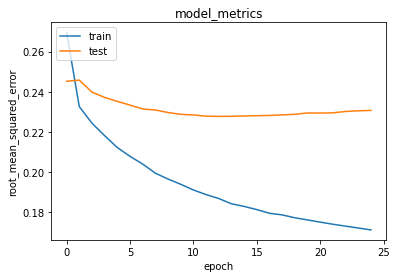

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Setelah dilakukan proses training, model yang dihasilkan cukup mulus dan konvergen. Dari proses ini, nilai error akhir yang dihasilkan sekitar 0.17 dan error validasi sebesar 0.23. Hal ini membuktikan bahwa model memiliki performasi bagus untuk sebuah sistem rekomendasi

In [ ]:
# Cek Sistem rekomendasi pada satu user

book_df = books
ratings_df = ratings
 
# Mengambil sample user
user_id = ratings_df.user_id.sample(1).iloc[0]
book_read_by_user = ratings_df[ratings_df.user_id == user_id]
 
# Membuat data buku yang belum diberikan rating oleh sample user
book_not_read = book_df[~book_df['book_id'].isin(book_read_by_user.book_id.values)]['book_id'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [ ]:
ratings_predict = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_predict.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .book_id.values
)
 
book_df_rows = book_df[book_df['book_id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title)
 
print('----' * 8)
print('Top 10 Book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['book_id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title)

25/25 [==============================] - 0s 2ms/step
Showing recommendations for users: 11569
Book with high ratings from user
--------------------------------
Into the Wild
The New York Trilogy
The Design of Everyday Things
The Broken Wings
What to Expect the First Year (What to Expect)
--------------------------------
Top 10 Book recommendation
--------------------------------
Girl with a Pearl Earring
Franny and Zooey
The War of the Worlds
A People's History of the United States
Still Life with Woodpecker
Memories of My Melancholy Whores
Hard Times
Amsterdam
Tears of the Giraffe (No. 1 Ladies' Detective Agency, #2)
Villa Incognito


Model telah memberikan 10 rekomendasi buku berdasarkan buku yang memiliki rating tertinggi dari user yang berarti model bekerja dengan baik.